# Lab 3 Data Representation II --- Text

### Acknowledgement: Part of this lab is based on a lab of data 8 developed at UC Berkeley.

The learning objectives of this lab are for you to be able to
<ol>
    <li> Split a piece of text into segments using .split in Python. </li>
    <li> Count the frequency a name occurs in a string using char.count in numpy. </li>
    <li> Visualize the change of word frequency in different chapters of a novel. </li>
    <li> Use CountVectorizer to transform tweets into their word frequency representation. </li>
    <li> Extract the words and the word frequency count from the word frequency matrix (at least when the number of tweets is small) </li>
    </ol>

In [1]:
!pip install datascience

In [2]:
import datascience

In [3]:
from datascience import *
import numpy as np
import matplotlib

In [4]:
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

### Import urlopen so that we can use python code to access and read an URL page.
The function read_url takes a url address as input, read, and decode it. 
Finally, the function substitutes all space characters (represented using a special symbol '\\s', including new line, tabs, etc) with ' ' using a method (sub) in the regular expression module (re).

'def' defines a new function, ':' indicates the remaining indented lines form the body of the function definition.  'return' indicates the value to be returned by the function.

In [5]:
from urllib.request import urlopen
import re
def read_url(url):
    return re.sub('\\s+', ' ', urlopen(url).read().decode())

#### Read a Novel from an URL address
We use the function defined above (read_url) to read the novel Adventures of Huckleberry Finn.

In [6]:
# Read The Adventures of Huckleberry Finn
huck_finn_url = 'http://introcs.cs.princeton.edu/python/33design/huckfinn.txt'
huck_finn_text = read_url(huck_finn_url)

### Splitting text into smaller segments
The entire text of the novel is stored in the variable "huck_finn_text".

In [7]:
print(huck_finn_text[:500])

The Project Gutenberg EBook of The Adventures of Huckleberry Finn, Complete by Mark Twain (Samuel Clemens) This eBook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever. You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.net Title: The Adventures of Huckleberry Finn, Complete Author: Mark Twain (Samuel Clemens) Release Date: June 29, 2004 [EBook #76] Language: English


### Split 
The .split() method of STRING takes an argument, which is the string used to divide the input text into segments.  The example below first uses 'CHAPTER ' to divide the entire novel into segments based on the chapters of the book, because each chapter starts with 'CHAPTER 1', 'CHAPTER 2', ....  
Because the first element of the list is the preface, we only want the contents of chapters after the fist element (preface).  We can do this using [1:], which indicates we only want those elements AFTER the first element (which has an index 0).  

In [8]:
list1=['This', 'is', 'an', 'exemplar', 'list']

In [9]:
sublist = list1[1:]

#### We can get a sublist from the original list by specifying the beginning and the end of the sublist.
For example, the following code extracts a sublist that starts on the 0th position (first in the list), ends before (not including) the 3rd position of the list.

In [10]:
sublist2 = list1[0:3]
print(sublist2)

['This', 'is', 'an']


### Split Chapters of a Novel
Now we are ready to split the entire novel into chapters, and take all of the chapters except the preface.

In [56]:
huck_finn_chapters = huck_finn_text[:500].split('CHAPTER ')[1:]
print(huck_finn_chapters)

[]


In [57]:
ChapTable=Table().with_column('Chapters', huck_finn_chapters)
ChapTable.show(10)

Chapters


### Split into words
We can also use split to break a sentence into words, by use space ' ' as the parameter of .split, because words of a sentence are separated by space.  Below is an example.

In [13]:
sentence='Penn State football is rising on the AP pool.'
print(sentence)

Penn State football is rising on the AP pool.


In [14]:
words=sentence.split()
print(words)

['Penn', 'State', 'football', 'is', 'rising', 'on', 'the', 'AP', 'pool.']


### Exercise 1
Create a sentence of your own, then use split(' ') to turn it into a list of words.

In [15]:
Mysentence = 'The basketball player dunked the ball.'
print(Mysentence)

The basketball player dunked the ball.


In [16]:
Mywords = Mysentence.split()
print(Mywords)

['The', 'basketball', 'player', 'dunked', 'the', 'ball.']


### Extracting a Specific Word from a Text
There are often a need to extract a specific word from a large piece of text.  One way to do it is to use numpy Python module char.count.  For example, the following code count, for each chapter, how many time 'Jim" appears.

In [17]:
np.char.count(huck_finn_chapters, 'Jim')

array([ 0, 16,  0,  8,  0,  0,  0, 22, 11, 19,  4, 20,  9,  6, 16, 28,  0,
       10, 13, 18,  1,  0,  9,  5,  0,  0,  0,  1,  3,  5, 17,  0,  4, 17,
       16, 23,  4, 26, 10, 12,  0, 11,  6])

#### As we can see, the result is a one-dimensional array.
The entries in the array show that 'Jim' occurs 0 time in Chapter 1, 16 time in Chapter 2, and so on.

### Exercise 2
Find out how many time 'Tom' appears in Chapter 1, 5 and 10.

In [18]:
np.char.count(huck_finn_chapters, 'Tom' )

array([ 6, 24,  5,  0,  0,  0,  2,  2,  0,  0,  2,  3,  1,  0,  0,  0,  3,
        5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1,  3, 19, 15,
       14, 18,  9, 32, 11, 11,  7, 29,  6])

### Put Your Answer in the next line of this text cell:
My Answer for Exercise 2: [ 6, 24,  5,  0,  0,  0,  2,  2,  0,  0,  2,  3,  1,  0,  0,  0,  3,
        5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1,  3, 19, 15,
       14, 18,  9, 32, 11, 11,  7, 29,  6]

### Comparing word frequency of different characters
We can collect the count of different character's name into a table: rows are chapters, columns are count for different character's name in the novel.

In [19]:
counts = Table().with_columns([
        'Jim', np.char.count(huck_finn_chapters, 'Jim'),
        'Tom', np.char.count(huck_finn_chapters, 'Tom'),
        'Huck', np.char.count(huck_finn_chapters, 'Huck')
    ])

In [20]:
counts.show(10)

Jim,Tom,Huck
0,6,3
16,24,2
0,5,2
8,0,1
0,0,0
0,0,2
0,2,0
22,2,5
11,0,1
19,0,0


### Visualize and Comparison
Can we vse visualization to compare the change of number of occurance of these three characters over different chapters in the novel?  
The answer is YES.  We can do this using plot.

Text(0.5, 1.0, 'Number of Times Each Name Appers in a Chapter')

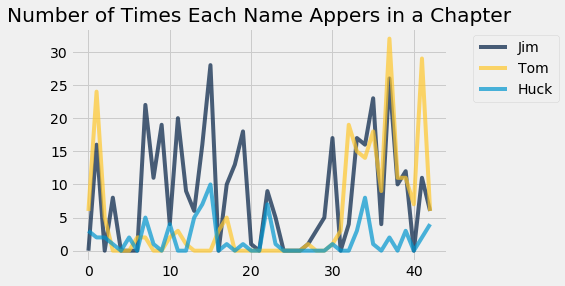

In [21]:
counts.plot()
plots.title('Number of Times Each Name Appers in a Chapter')

### We can also compare the cumulative total appearance of a name from Chapter 1. 
This can be done using .cumsum() method of numpy.

In [22]:
counts.cumsum()

Jim,Tom,Huck
0,6,3
16,30,5
16,35,7
24,35,8
24,35,8
24,35,10
24,37,10
46,39,15
57,39,16
76,39,16


In [23]:
cum_counts = counts.cumsum().with_column('Chapter', np.arange(1, 44, 1))
cum_counts.show(10)

Jim,Tom,Huck,Chapter
0,6,3,1
16,30,5,2
16,35,7,3
24,35,8,4
24,35,8,5
24,35,10,6
24,37,10,7
46,39,15,8
57,39,16,9
76,39,16,10


Text(0.5, 1.08, 'Cumulative Number of Times Each Name Appears')

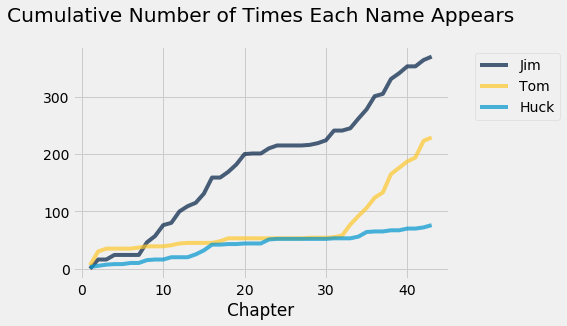

In [24]:
cum_counts.plot(column_for_xticks=3)
plots.title('Cumulative Number of Times Each Name Appears', y=1.08)

In [25]:
# Read Little Women
little_women_url = 'https://raw.githubusercontent.com/ehmatthes/pcc_prep/master/chapter_10/little_women.txt'
little_women_text = read_url(little_women_url)

### Exercise 3 Separate Text Using Split
In this exercise, separate the novel "Little Woman" into multiple segments based on its chapters.
#### Hint: Each chapter starts with 'CHAPTER n' where n is the number of the chapter.

In [58]:
little_women_chapters = little_women_text[:500].split('CHAPTER')[1:]
print(little_women_chapters)

[]


#### You can then create a table with one column (column heading is 'Chapters'

In [27]:
# A glance of the chapters
Table().with_column('Chapters', little_women_chapters)

Chapters
"ONE PLAYING PILGRIMS ""Christmas won't be Christmas with ..."
TWO A MERRY CHRISTMAS Jo was the first to wake in the g ...
"THREE THE LAURENCE BOY ""Jo! Jo! Where are you?"" cried M ..."
"FOUR BURDENS ""Oh, dear, how hard it does seem to take u ..."
"FIVE BEING NEIGHBORLY ""What in the world are you going ..."
SIX BETH FINDS THE PALACE BEAUTIFUL The big house did p ...
"SEVEN AMY'S VALLEY OF HUMILIATION ""That boy is a perfec ..."
"EIGHT JO MEETS APOLLYON ""Girls, where are you going?"" a ..."
"NINE MEG GOES TO VANITY FAIR ""I do think it was the mos ..."
"TEN THE P.C. AND P.O. As spring came on, a new set of a ..."


In [28]:
# Counts of names in the chapters of Little Women
counts = Table().with_columns([
        'Amy', np.char.count(little_women_chapters, 'Amy'),
        'Beth', np.char.count(little_women_chapters, 'Beth'),
        'Jo', np.char.count(little_women_chapters, 'Jo'),
        'Meg', np.char.count(little_women_chapters, 'Meg'),
        'Laurie', np.char.count(little_women_chapters, 'Laurie'),
    ])

Text(0.5, 1.08, 'Cumulative Number of Times Each Name Appears')

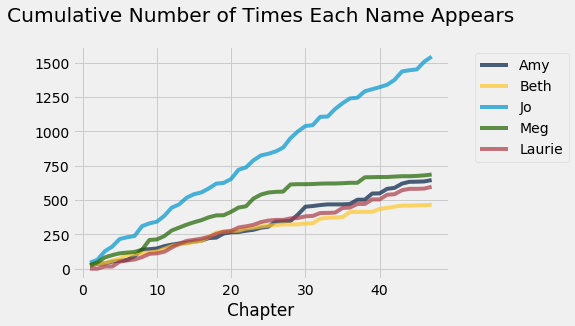

In [29]:
# Plot the cumulative counts.
cum_counts = counts.cumsum().with_column('Chapter', np.arange(1, 48, 1))
cum_counts.plot(column_for_xticks=5)
plots.title('Cumulative Number of Times Each Name Appears', y=1.08)

### Representing Text as Word Frequency
We are going to learn to create a word frequency representation of text.
First we need to import CountVectorizer (from sklearn module) for this part of the lab.
Sklearn is a Python machine learning module.  We will use it in some of the future labs
as well.

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

In [31]:
tweets =["Penn State football is great.", "Penn State is a great state university.", \
"Is Saturday a great game?", "Penn State football had a great game Saturday."]
print(tweets)

['Penn State football is great.', 'Penn State is a great state university.', 'Is Saturday a great game?', 'Penn State football had a great game Saturday.']


In [32]:
vectorizer = CountVectorizer()

In [33]:
WFmatrix= vectorizer.fit_transform(tweets)
print(vectorizer.get_feature_names())

['football', 'game', 'great', 'had', 'is', 'penn', 'saturday', 'state', 'university']


In [34]:
WFarray= WFmatrix.toarray()
print(WFarray)

[[1 0 1 0 1 1 0 1 0]
 [0 0 1 0 1 1 0 2 1]
 [0 1 1 0 1 0 1 0 0]
 [1 1 1 1 0 1 1 1 0]]


### Exercise 4
Create a list of 3-4 sentences/tweets that share some common words. Use CountVectorizer to create a Word Frequency representation of the sentences/tweets. Print the words (using get_feature_names() of vectorizer) of the matrix. Print the word frequency matrix.

In [35]:
mytweets=["There are many people living in East Halls", "Some people live in renovated dorms",  "Other people live in traditional dorms", "East halls is mostly freshmen"]
# We add '\n' (a new line) to the end of mytweets in the print statement below.
print(mytweets,'\n')
vectorizer = CountVectorizer()
myWFmatrix = vectorizer.fit_transform(mytweets)
print(vectorizer.get_feature_names())

['There are many people living in East Halls', 'Some people live in renovated dorms', 'Other people live in traditional dorms', 'East halls is mostly freshmen'] 

['are', 'dorms', 'east', 'freshmen', 'halls', 'in', 'is', 'live', 'living', 'many', 'mostly', 'other', 'people', 'renovated', 'some', 'there', 'traditional']


In [36]:
myWFarray = myWFmatrix.toarray()
print(myWFarray)

[[1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 1 0]
 [0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0]
 [0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1]
 [0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0]]


### Representing Tweets as Word Frequency
We are going to read some actual tweets and see how they can be convered to Word Frequency representation in a similar way.

In [37]:
t1 = Table.read_table("LabelledTweets.csv", sep =',')
t1.show(5)

Text,Support
RT @kasserolees: Energy is the #1 contributer to climate ...,1
RT @edelman_barbara: @msnbc why don t you have a climate ...,1
RT @OtagoGrad: @anthonyfurey @OskieOckham The data doesn ...,0
The Dow just recorded its 3rd worst day ever. Think @rea ...,0
RT @SimonBanksHB: I am not going to rule out things base ...,0


### Sample a small number of tweets 
We first sample a small number of tweets so that the word frequency table is not too large to visualize.

In [38]:
sampled_t1 = t1.sample(4)
sampled_t1

Text,Support
@elizabethforma @algore Hello we were HELPLESS when Obam ...,0
RT @RealDrGina: Translation: Mueller witch hunt didn t w ...,0
RT @MikeHudema: 100 000 That s how many orangutans have ...,1
RT @WhitfordBradley: Rick Scott is a science denier who ...,1


### We take the column "Text" of the sampled tweet table, then use the list function to turn it into a list.

In [39]:
sampled_list= list(sampled_t1["Text"])
print(sampled_list)

['@elizabethforma @algore Hello we were HELPLESS when Obama was in office! Destroyed lost our jobs homes EVERYTHING! The only time climate change would of helped us was.......good weather while living on the curb!', 'RT @RealDrGina: Translation: Mueller witch hunt didn t work. Borking Kavanaugh failed. They can t get Americans to vote 4 them so Dems nee', 'RT @MikeHudema: 100 000 That s how many orangutans have died in the past 16 years. Their habitat is being destroyed to make way to palm oil', 'RT @WhitfordBradley: Rick Scott is a science denier who banned the use of the phrase climate change to satisfy his dark money benefactors']


In [40]:
count_vect = CountVectorizer()
tweet_vect = count_vect.fit_transform(sampled_list)

### Exercise 5
Display the words and the word frequency extracted from the tweets in the sampled_list, using the word frequency matrix generated by CountVectorizer and fit_transform above.

In [46]:
print(count_vect.get_feature_names())

['000', '100', '16', 'algore', 'americans', 'banned', 'being', 'benefactors', 'borking', 'can', 'change', 'climate', 'curb', 'dark', 'dems', 'denier', 'destroyed', 'didn', 'died', 'elizabethforma', 'everything', 'failed', 'get', 'good', 'habitat', 'have', 'hello', 'helped', 'helpless', 'his', 'homes', 'how', 'hunt', 'in', 'is', 'jobs', 'kavanaugh', 'living', 'lost', 'make', 'many', 'mikehudema', 'money', 'mueller', 'nee', 'obama', 'of', 'office', 'oil', 'on', 'only', 'orangutans', 'our', 'palm', 'past', 'phrase', 'realdrgina', 'rick', 'rt', 'satisfy', 'science', 'scott', 'so', 'that', 'the', 'their', 'them', 'they', 'time', 'to', 'translation', 'us', 'use', 'vote', 'was', 'way', 'we', 'weather', 'were', 'when', 'while', 'whitfordbradley', 'who', 'witch', 'work', 'would', 'years']


In [55]:
tweetWFarray = tweet_vect.toarray()
print(tweetWFarray)

[[0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 0 1
  0 1 1 0 0 0 0 0 0 1 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 1 0 0 1
  0 0 2 0 1 1 1 1 1 0 0 0 0 1 0]
 [0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0
  1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0
  0 1 0 0 0 0 0 0 0 0 0 1 1 0 0]
 [1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0
  0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 2 0 0
  0 0 0 1 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
  0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 2 0 0 0 0 1 0 0
  1 0 0 0 0 0 0 0 0 1 1 0 0 0 0]]
